# House Prices: Advanced Regression Techniques:

## EDA, Feature Selection, & Feature Engineering

- Eric Meyers

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Import libraries, set display options, and import cleaned/imputed raw data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [80]:
ames = pd.read_csv('./train_imputed.csv', index_col = 0)

In [81]:
ames.sample(15)

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
676          160       RL    24.000000     2289   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl      NPkVill       Norm       Norm    Twnhs     2Story            6            6       1978          1978     Gable  CompShg     Plywood     Brk Cmn       None         0.0        TA        TA     CBlock       TA       TA           No          ALQ         311          Unf           0        544          855    GasA        TA          Y      SBrkr       855       586             0       1441             0             0         2         1             3             1          TA             7        Typ           1          TA     Attchd       1978.0          Unf           2         440         TA         TA          Y          28            0              0          0            0         0  No_Pool  No_Fence       No_MF        0       4    2009       WD        Normal     148500
649           60       RL    70.000000     7700   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl        NAmes       PosN       Norm     1Fam     2Story            6            5       1966          1966     Gable  CompShg     MetalSd     MetalSd    BrkFace       351.0        TA        TA     CBlock       TA       TA           No          Unf           0          Unf           0        756          756    GasA        TA          Y      SBrkr      1051       788             0       1839             0             0         1         1             4             1          TA             7        Typ           1          TA     Attchd       1966.0          Unf           2         442         TA         TA          Y           0          124            216          0            0         0  No_Pool  No_Fence       No_MF        0       6    2010       WD        Normal     155000
299           60       RL    90.000000    11700   Pave  No_Alley      Reg         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam     2Story            6            6       1968          1968   Mansard  CompShg     HdBoard     AsphShn    BrkFace       365.0        Gd        TA     CBlock       TA       TA           No          ALQ         384          Rec   

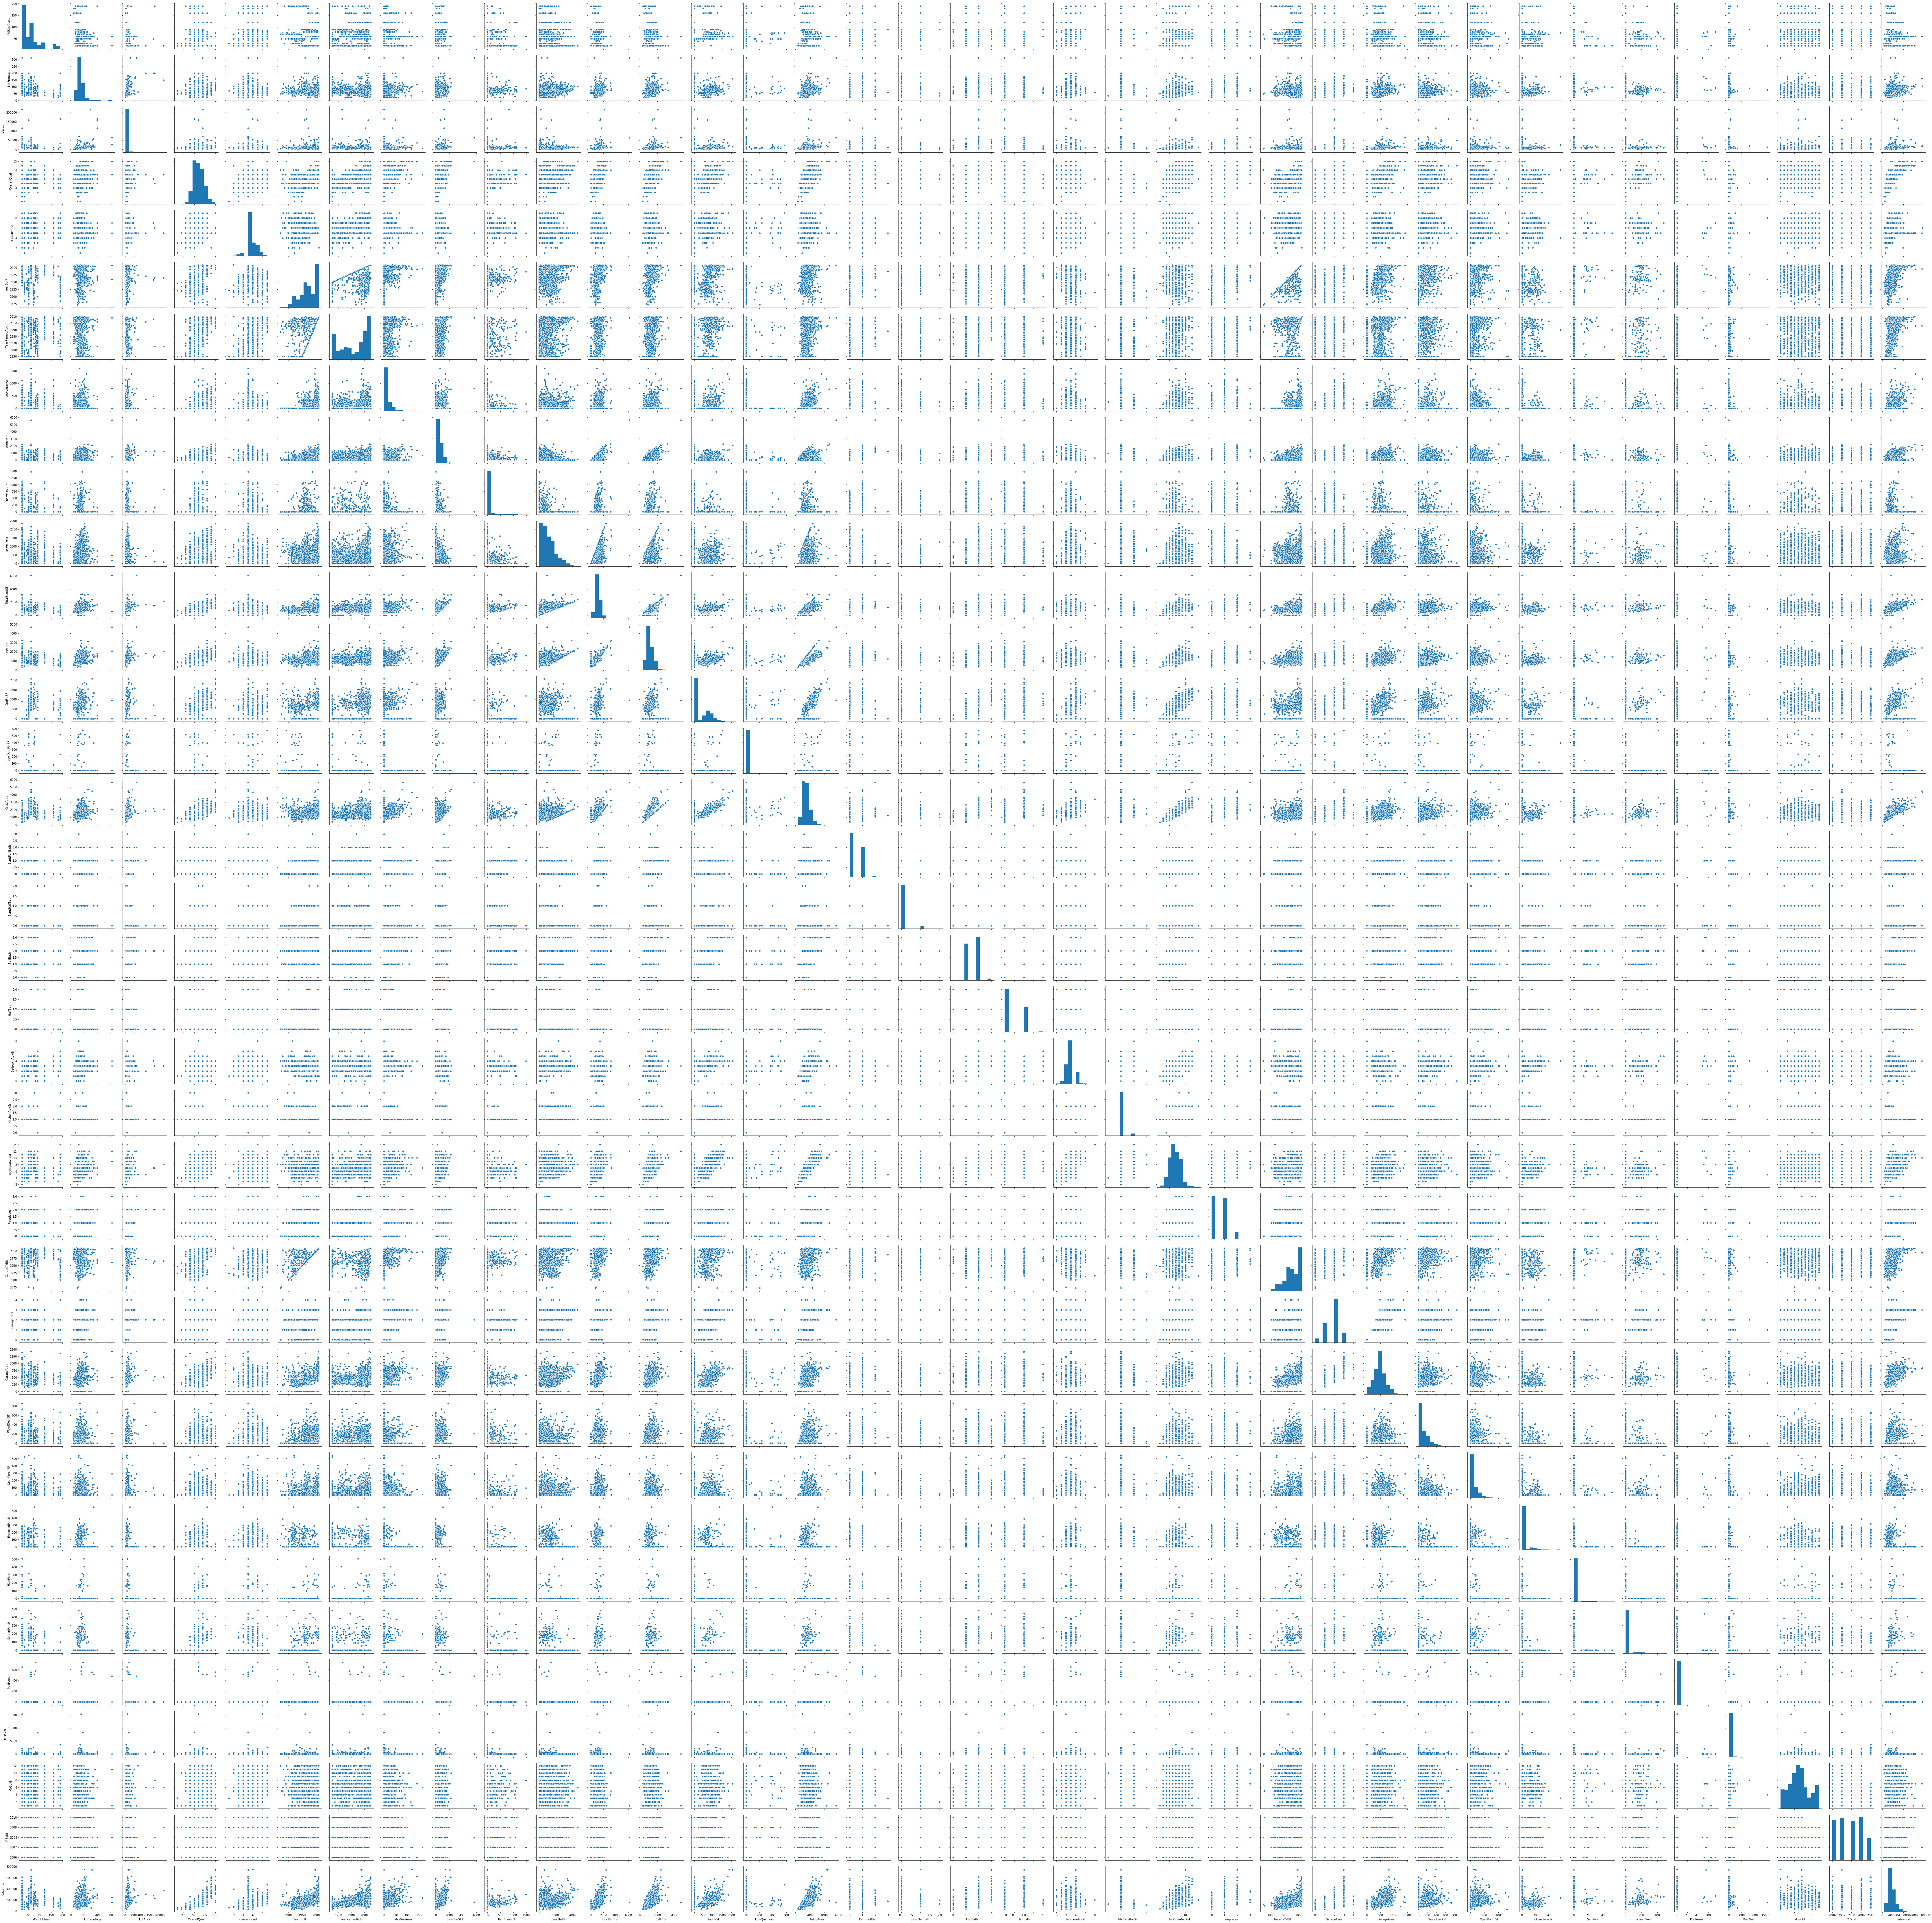

In [6]:
sns.pairplot(ames)

### Target: SalePrice

Let's learn more about our target variable: SalePrice, and check its distribution. Do we need to transform?

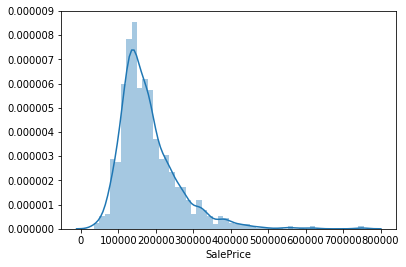

In [8]:
sns.distplot(ames.SalePrice, bins = 50)

Observation: SalePrice is distributed with a right-skew. We normalize the distribution with a transformation of log1p (i.e. log(1 + x)).

In [39]:
y = np.array(ames.SalePrice)
y_trans = np.log1p(y)

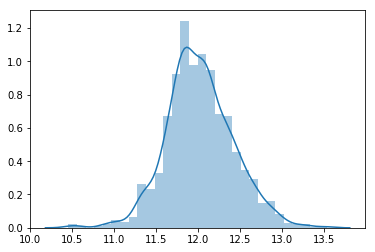

In [42]:
sns.distplot(y_trans, bins = 30)

In [9]:
ames.SalePrice.describe() #stats reflecting right skew. Also note: min = $35k, max = $755k.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### SalePrice and relationship vs. Features

Let's look at correlation first, then plot some highly-correlated features to understand their relationships.

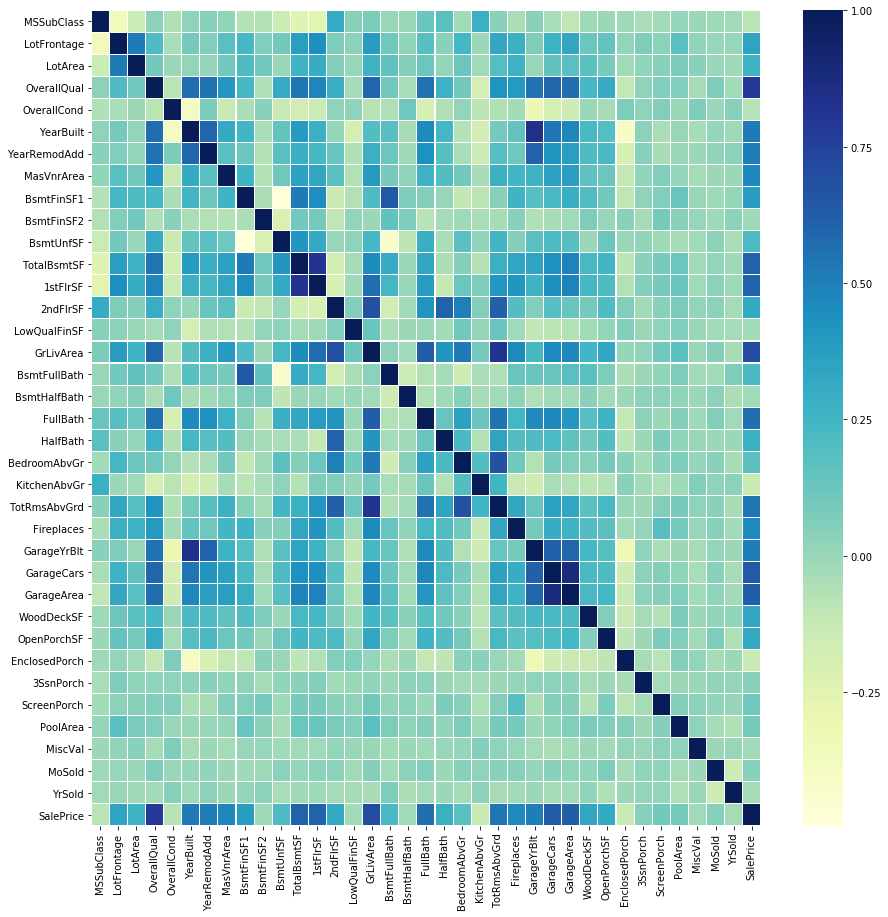

In [54]:
plt.subplots(figsize = (15, 15))
ames_corr = ames.corr()
msk = np.zeros_like(ames_corr, dtype=np.bool)
sns.heatmap(ames_corr, mask = msk, cmap = "YlGnBu", linewidths = 0.1)

In [55]:
ames.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.352415 -0.139781     0.032628    -0.059316   0.027850      0.040581    0.023573   -0.069836   -0.065649  -0.140759    -0.238518 -0.251758  0.307886      0.046474   0.074853      0.003491     -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380   -0.045569     0.039567   -0.040110   -0.098672   -0.012579    -0.006100      -0.012037  -0.043825    -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284
LotFrontage     -0.352415     1.000000  0.519923     0.206218    -0.040530   0.095011      0.063455    0.178459    0.236128    0.061539   0.102661     0.371519  0.440357  0.066882      0.031727   0.382460      0.109815      0.023464  0.186813  0.037903      0.240957     -0.004911      0.324583    0.282029     0.066467    0.271205    0.326464    0.118315     0.146816       0.014573   0.069569     0.031934  0.176750  0.022255  0.001806  0.003066   0.342592
LotArea         -0.139781     0.519923  1.000000     0.105806    -0.005636   0.014228      0.013788    0.103321    0.214103    0.111170  -0.002618     0.260833  0.299475  0.050986      0.004779   0.263116      0.158155      0.048046  0.126031  0.014259      0.119690     -0.017784      0.190015    0.271364     0.003669    0.154871    0.180403    0.171698     0.084774      -0.018340   0.020423     0.043160  0.077672  0.038068  0.001205 -0.014261   0.263843
OverallQual      0.032628     0.206218  0.105806     1.000000    -0.091932   0.572323      0.550684    0.407252    0.239666   -0.059119   0.308159     0.537808  0.476224  0.295493     -0.030429   0.593007      0.111098     -0.040150  0.550600  0.273458      0.101676     -0.183882      0.427452    0.396765     0.555022    0.600671    0.562022    0.238923     0.308819      -0.113937   0.030371     0.064886  0.065166 -0.031406  0.070815 -0.027347   0.790982
OverallCond     -0.059316    -0.040530 -0.005636    -0.091932     1.000000  -0.375983      0.073741   -0.125694   -0.046231    0.040229  -0.136841    -0.171098 -0.144203  0.028942      0.025494  -0.079686     -0.054942      0.117821 -0.194149 -0.060769      0.012980     -0.087001     -0.057583   -0.023820    -0.296887   -0.185758   -0.151521   -0.003334    -0.032589       0.070356   0.025504     0.054811 -0.001985  0.068777 -0.003511  0.043950  -0.077856
YearBuilt        0.027850     0.095011  0.014228     0.572323    -0.375983   1.000000      0.592855    0.311600    0.249503   -0.049107   0.149040     0.391452  0.281986  0.010308     -0.183784   0.199010      0.187599     -0.038162  0.468271  0.242656     -0.070651     -0.174800      0.095589    0.147716     0.845141    0.537850    0.478954    0.224880     0.188686      -0.387268   0.031355    -0.050364  0.004950 -0.034383  0.012398 -0.013618   0.522897
YearRemodAdd     0.040581     0.063455  0.013788     0.550684     0.073741   0.592855      1.000000    0.176529    0.128451   -0.067759   0.181133     0.291066  0.240379  0.140024     -0.062419   0.287389      0.119470     -0.012337  0.439046  0.183331     -0.040581     -0.149598      0.191740    0.112581     0.604353    0.420622    0.371600    0.205726     0.226298      -0.193919   0.045286    -0.038740  0.005829 -0.010286  0.021490  0.035743   0.507101
MasVnrArea       0.023573     0.178459  0.103321     0.407252    -0.125694   0.311600      0.176529    1.000000    0.261256   -0.071330   0.113862     0.360067  0.339850  0.173800     -0.068628   0.388052      0.083010      0.027403  0.272999  0.199108      0.102775     -0.038450      0.279568    0.247015     0.267224    0.361945    0.370884

Note: some strong correlations to SalePrice:
- OverallQual (79%)
- TotalBsmtSF (61%)
- 1stFlrSF (61%)
- GrLivArea (71%
- GarageCars (64%)
- GarageArea (62%)

Now let's plot these against transformed y:

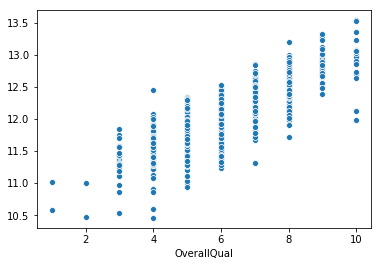

In [63]:
sns.scatterplot(x = 'OverallQual', y = y_trans, data = ames)

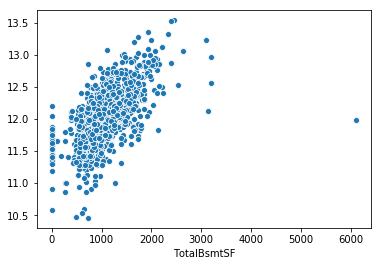

In [62]:
sns.scatterplot(x = 'TotalBsmtSF', y = y_trans, data = ames)

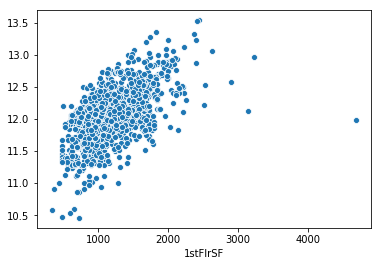

In [61]:
sns.scatterplot(x = '1stFlrSF', y = y_trans, data = ames)

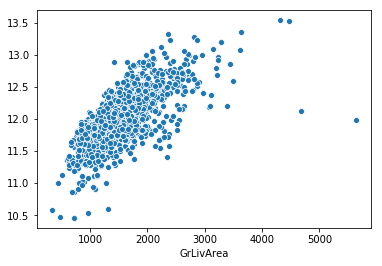

In [60]:
sns.scatterplot(x = 'GrLivArea', y = y_trans, data = ames)

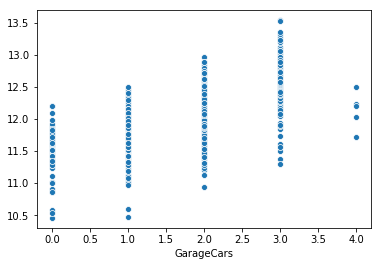

In [64]:
sns.scatterplot(x = 'GarageCars', y = y_trans, data = ames)

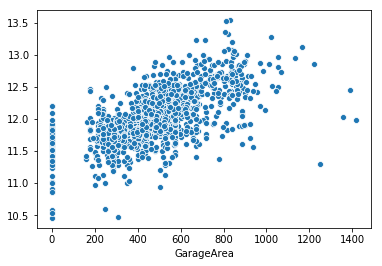

In [65]:
sns.scatterplot(x = 'GarageArea', y = y_trans, data = ames)

### Other strongly correlated features:
- 1stFlrSF vs. TotalBsmtSF
- 2ndFlrSF vs. GrLivArea
- TotRmsAbvGrd vs. GrLivArea
- GarageYrBlt vs. YearBuilt
- GarageArea vs. GarageCars

Plot these relationships:

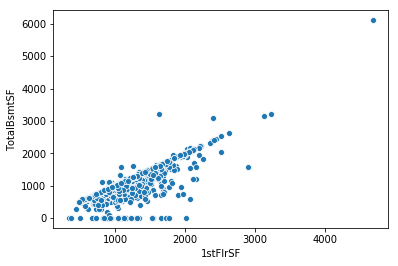

In [66]:
sns.scatterplot(x = '1stFlrSF', y = 'TotalBsmtSF', data = ames)

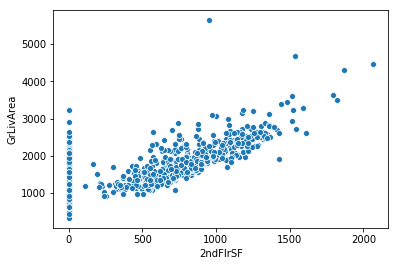

In [67]:
sns.scatterplot(x = '2ndFlrSF', y = 'GrLivArea', data = ames) #makes sense bc 2ndFlrSF is part of GrLivArea

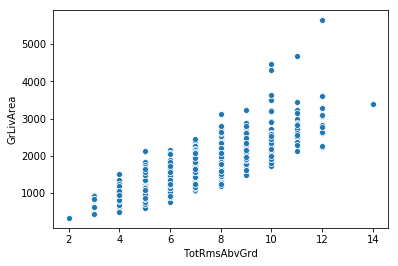

In [68]:
sns.scatterplot(x = 'TotRmsAbvGrd', y = 'GrLivArea', data = ames)

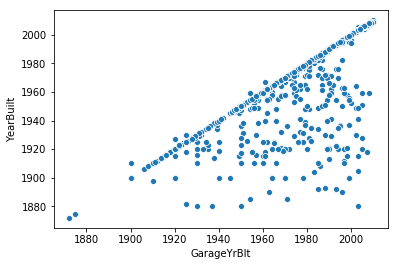

In [69]:
sns.scatterplot(x = 'GarageYrBlt', y = 'YearBuilt', data = ames) #This is as expected.

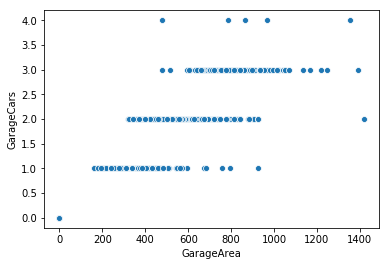

In [70]:
sns.scatterplot(x = 'GarageArea', y = 'GarageCars', data = ames) #Also as expected

Observations:
- GrLivArea seems to have a strong relationship with target price, TotRmsAbvGrd, AND 2ndFlrSF
- TotalSF is missing as a feature while individual SF's seem to have some strong relationships.
- Year Built vs. Garage Year Built & GarageCars vs. GarageArea have an expectedly strong relationship.

### Ordinal Features

The following features have a quality or condition rating. But this is useless in regression unless we can enumerate them.
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- Functional
- FireplaceQu
- GarageQual
- GarageCond
- PoolQC
- Fence

Let's convert!

In [82]:
ames.ExterQual = ames.ExterQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [84]:
ames.ExterCond = ames.ExterCond.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [86]:
ames.BsmtQual = ames.BsmtQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_BQ', 0)

In [89]:
ames.BsmtCond = ames.BsmtCond.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_BC', 0)

In [91]:
ames.BsmtExposure = ames.BsmtExposure.replace('Gd', 4).replace('Av', 3).replace('Mn', 2).replace('No', 1).replace('No_BE', 0)

In [93]:
ames.BsmtFinType1 = ames.BsmtFinType1.replace('GLQ', 6).replace('ALQ',5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('No_BFT1', 0)

In [133]:
ames.BsmtFinType2 = ames.BsmtFinType2.replace('GLQ', 6).replace('ALQ',5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('No_BFT2', 0)

In [99]:
ames.HeatingQC = ames.HeatingQC.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [102]:
ames.KitchenQual = ames.KitchenQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

In [114]:
ames.Functional = ames.Functional.replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Min1', 3).replace('Min2', 2).replace('Sev', 1).replace('Sal', 0)

In [109]:
ames.FireplaceQu = ames.FireplaceQu.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_FP', 0)

In [110]:
ames.GarageQual = ames.GarageQual.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_GQ', 0)

In [111]:
ames.GarageCond = ames.GarageCond.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1).replace('No_GC', 0)

In [112]:
ames.PoolQC = ames.PoolQC.replace('Ex', 3).replace('Gd', 2).replace('Fa', 1).replace('No_Pool', 0)

In [113]:
ames.Fence = ames.Fence.replace('GdPrv', 4).replace('MnPrv', 3).replace('GdWo', 2).replace('MnWw', 1).replace('No_Fence', 0)

Now let's re-correlate to see if we picked up any new strong relationships:

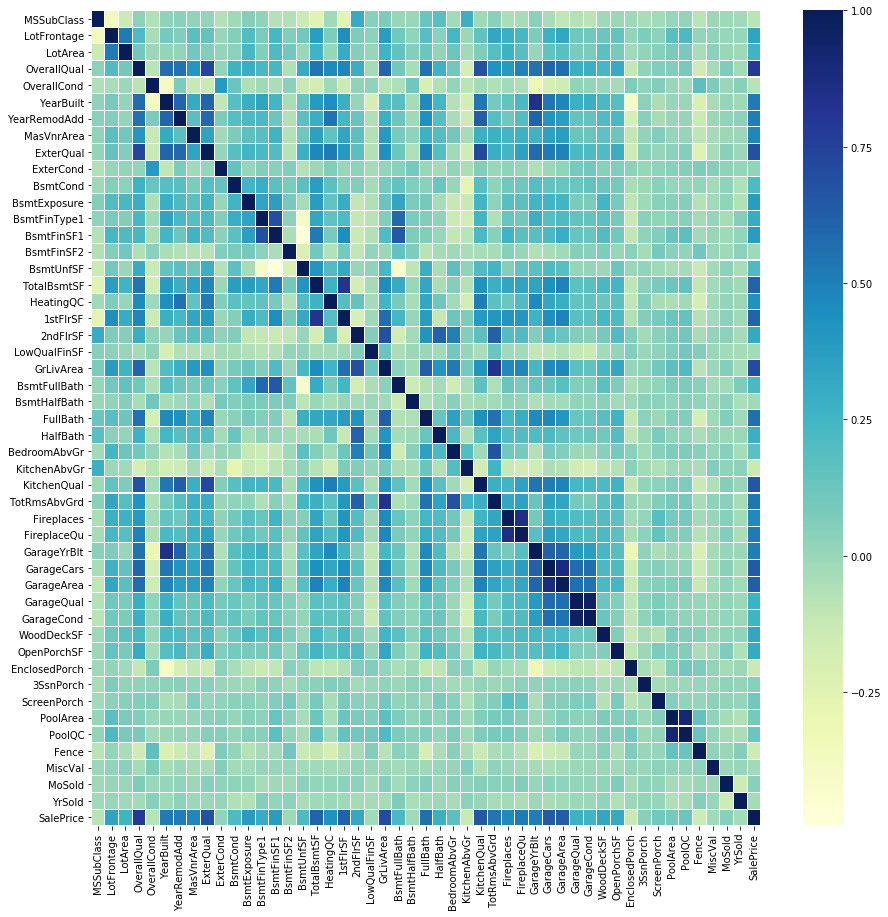

In [115]:
plt.subplots(figsize = (15, 15))
ames_corr = ames.corr()
msk = np.zeros_like(ames_corr, dtype=np.bool)
sns.heatmap(ames_corr, mask = msk, cmap = "YlGnBu", linewidths = 0.1)

Observation:
Nothing alarmingly new. There seems to be opportunities to combine like-fields, let's create some features.

### Feature Engineering:

Based on the above EDA, we'll try creating new features derived from combinations of others and see how they relate.
Methodology: Sum square footage metrics to create aggregated SF metrics and multiply Quality/Condition metrics to combine in a relative-magnitude format.
+ InsideSF
+ OutsideSF
+ TotalSF
+ OverallQualCond
+ GarageCarArea
+ ExterQualCond
+ BsmtQualCond
+ BsmtQualCondPlus
+ FireplacesQu
+ GarageQualCond

In [116]:
ames['InsideSF'] = ames['TotalBsmtSF'] + ames['GrLivArea'] + ames['GarageArea'] + ames['EnclosedPorch']

In [117]:
ames['OutsideSF'] = ames['WoodDeckSF'] + ames['OpenPorchSF'] + ames['PoolArea']

In [118]:
ames['TotalSF'] = ames['InsideSF'] + ames['OutsideSF']

In [119]:
ames['OverallQualCond'] = ames['OverallQual'] * ames['OverallCond']

In [120]:
ames['GarageCarArea'] = ames['GarageCars'] * ames['GarageArea']

In [121]:
ames['ExterQualCond'] = ames['ExterQual'] * ames['ExterCond']

In [122]:
ames['BsmtQualCond'] = ames['BsmtQual'] * ames['BsmtCond']

In [134]:
ames['BsmtQualCondPlus'] = ames['BsmtQual'] * ames['BsmtCond'] * ames['BsmtExposure'] * ames['BsmtFinType1'] * ames['BsmtFinType2']

In [124]:
ames['FireplacesQu'] = ames['Fireplaces'] * ames['FireplaceQu']

In [125]:
ames['GarageQualCond'] = ames['GarageQual'] * ames['GarageCond']

And re-correlate once more to see how new features relate to others (bottom right corner)

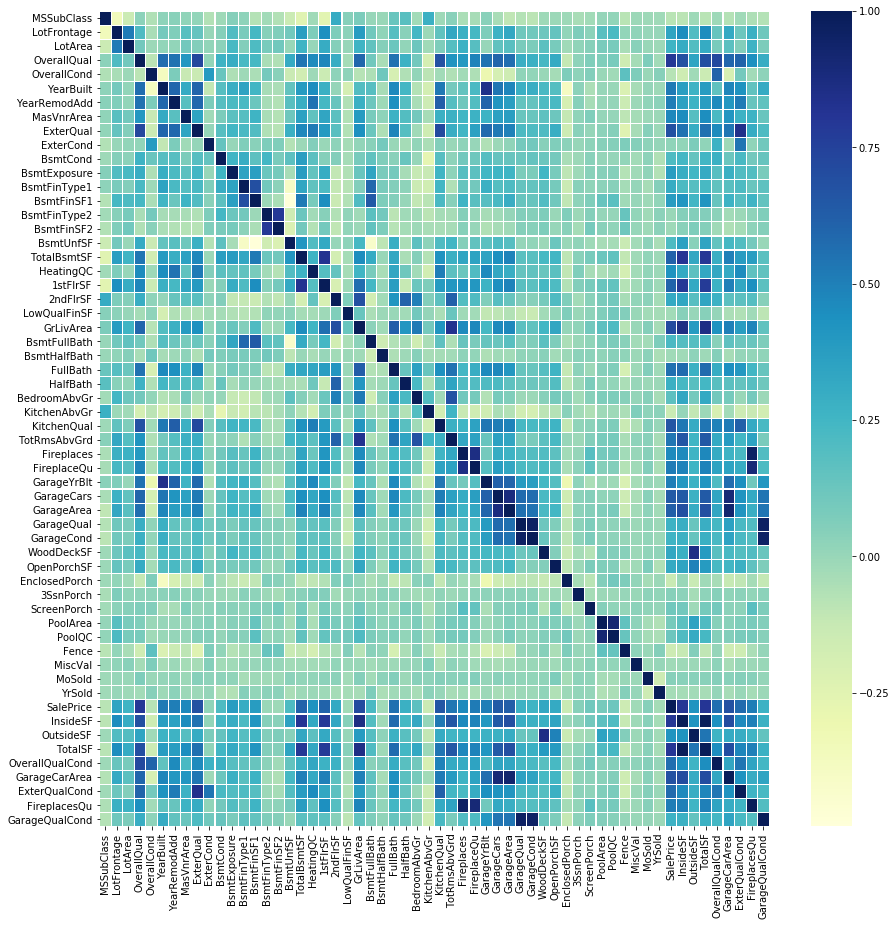

In [135]:
plt.subplots(figsize = (15, 15))
ames_corr = ames.corr()
msk = np.zeros_like(ames_corr, dtype=np.bool)
sns.heatmap(ames_corr, mask = msk, cmap = "YlGnBu", linewidths = 0.1)